## FINAL DEMO

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import scipy.stats as st
from functions import *
from graphics import *
from statistics_tests import *
import pandas as pd

df_final_demo = get_final_demo_df()

df_web_data_concat = get_web_data_df()

df_final_exp = get_final_exp_df()

df_all = get_df_all()

LIMPIEZA DE DATOS

In [59]:
df_all = df_all.drop("clnt_tenure_yr", axis=1)      # We don´t need this column because is derivative from clnt_tenure_mnth

In [60]:
df_all_no_duplicates = get_df_all_no_duplicates()

QUITAMOS OUTLIERS DEL DF_ALL Y DEL QUE NO TIENE DUPLICADOS

In [61]:
df_all = outlier_slayer(df_all)

df_all_no_duplicates = outlier_slayer(df_all_no_duplicates)

# VER SI SON JOVENES O NO

In [62]:
print_stats(df_all_no_duplicates['clnt_age'])

(count    34901.000000
 mean        46.050027
 std         15.322211
 min         17.000000
 25%         32.500000
 50%         46.000000
 75%         58.500000
 max         96.000000
 Name: clnt_age, dtype: float64,
 'Mode: 30.5')

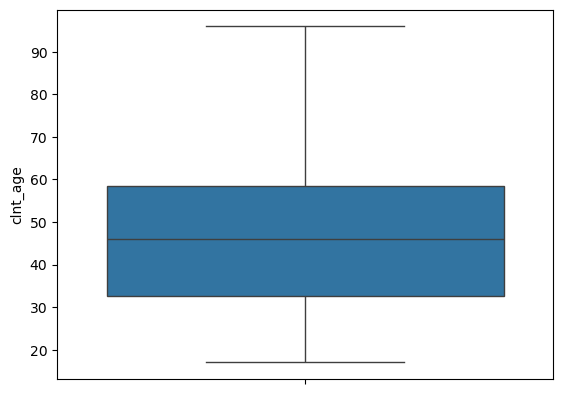

In [63]:
graph_box_plot(df_all_no_duplicates['clnt_age'])

In [64]:
get_limits(df_all_no_duplicates['clnt_age'])

(-6.5, 97.5)

# VER SI SON NUEVOS O ANTIGUOS

In [65]:
print_stats(df_all_no_duplicates['clnt_tenure_mnth'])

(count    34901.000000
 mean       137.549669
 std         68.435589
 min         33.000000
 25%         79.000000
 50%        123.000000
 75%        181.000000
 max        353.000000
 Name: clnt_tenure_mnth, dtype: float64,
 'Mode: 58.0')

In [66]:
get_limits(df_all_no_duplicates['clnt_tenure_mnth'])   # Seguimos teniendo outliers pero dar una segunda pasada es contraproducente en principio.

(-74.0, 334.0)

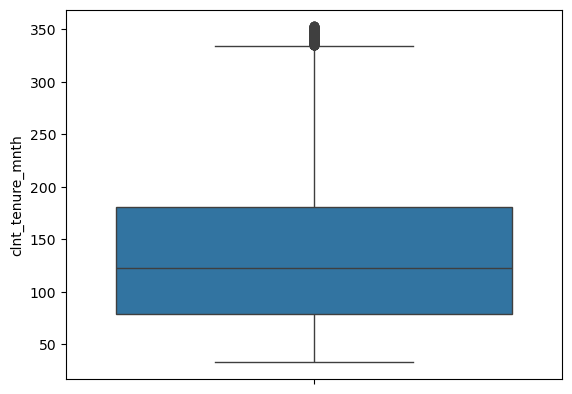

In [67]:
graph_box_plot(df_all_no_duplicates['clnt_tenure_mnth'])

# DIA 3  
## Calcular % de compras con éxito en cada web

In [68]:
df_id_max_compras = df_all.groupby(["client_id", "visit_id", "variation"])["date_time"].idxmax()

In [69]:
df_ambos_portales = df_all.loc[df_id_max_compras]

In [70]:
get_last_step(df_ambos_portales, 0)


    El % de gente que se quedó en el INICIO en la web de CONTROL es de 30.232025994233673
    El % de gente que se quedó en el PASO 1 en la web de CONTROL es de 9.578508992723446
    El % de gente que se quedó en el PASO 2 en la web de CONTROL es de 4.7366253260720335
    El % de gente que se quedó en el PASO 3 en la web de CONTROL es de 7.372660290146904
    El % de gente que CONFIRMÓ la compra en la web de CONTROL es de 48.080179396823944
      


In [71]:
get_last_step(df_ambos_portales, 1)


    El % de gente que se quedó en el INICIO en la web de TEST es de 25.807860262008735
    El % de gente que se quedó en el PASO 1 en la web de TEST es de 8.745533942040492
    El % de gente que se quedó en el PASO 2 en la web de TEST es de 3.6244541484716155
    El % de gente que se quedó en el PASO 3 en la web de TEST es de 4.958316792377928
    El % de gente que CONFIRMÓ la compra en la web de TEST es de 56.86383485510123
      


In [72]:
df_control = df_ambos_portales[df_ambos_portales["variation"] == 0]
df_test = df_ambos_portales[df_ambos_portales["variation"] == 1]

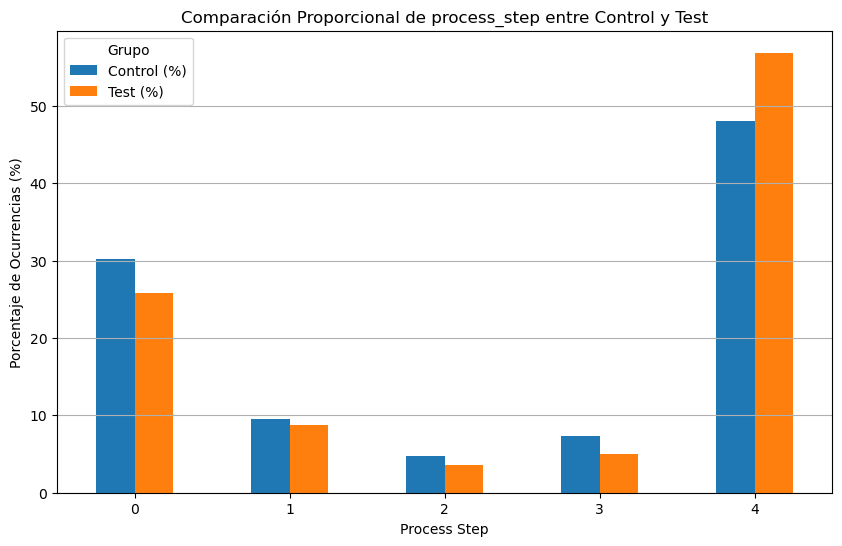

In [73]:
graph_bar_plot_control_v_test(df_control, df_test)

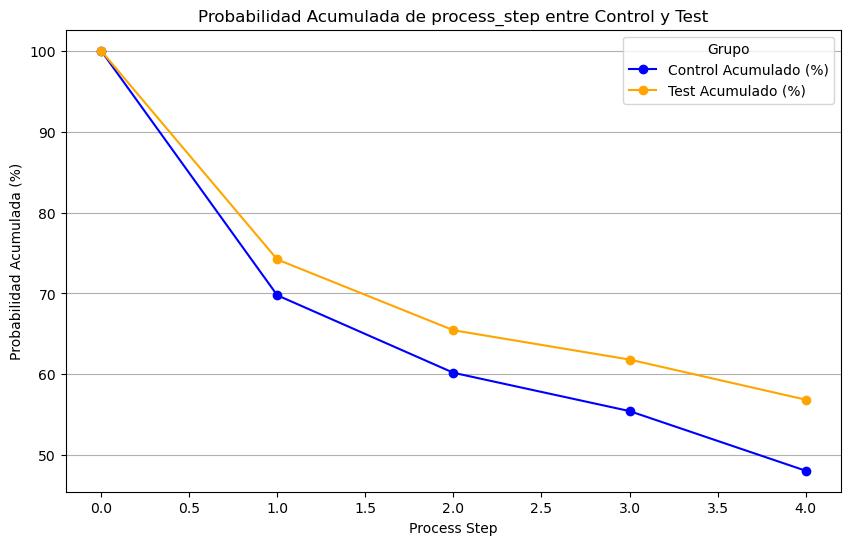

In [74]:
graph_process_step_controlVtest(df_control, df_test)

# DIA 4 -> TEST DE HIPÓTESIS

In [75]:
get_z_test_values(df_control, df_test, "smaller")

Tasa de completación del grupo de control: 48.08%
Tasa de completación del grupo de test: 56.86%
Estadístico Z: -19.0323
P-valor: 4.607445859222419e-81
Podemos afirmar con un 95% de confianza que la diferencia en la tasa de completación es estadísticamente significativa (rechazamos H0).


In [76]:
chi_cuadrado_test(df_control, df_test)

Chi-cuadrado: 361.8755
P-valor: 1.0995446851831193e-80
La diferencia en la tasa de completación es estadísticamente significativa (rechazamos H0).


In [77]:
# Contar el número de clientes que completaron la compra (step 4)
control_complete = df_control[df_control["process_step"] == 4].shape[0]
test_complete = df_test[df_test["process_step"] == 4].shape[0]

# Contar el número de clientes en cada grupo
n_control = df_control.shape[0]
n_test = df_test.shape[0]

# Calcular la tasa de completación
control_completion_rate = control_complete / n_control
test_completion_rate = test_complete / n_test

In [78]:
umbral_aumento(df_control, df_test)

El aumento observado es de 18.27%, con lo que cumple con el umbral del 5%.


--- FIN DIA 5

In [79]:
crosstab_result_gen_var = get_crosstab(df_ambos_portales["gendr"], df_ambos_portales["variation"])

<Axes: xlabel='gendr'>

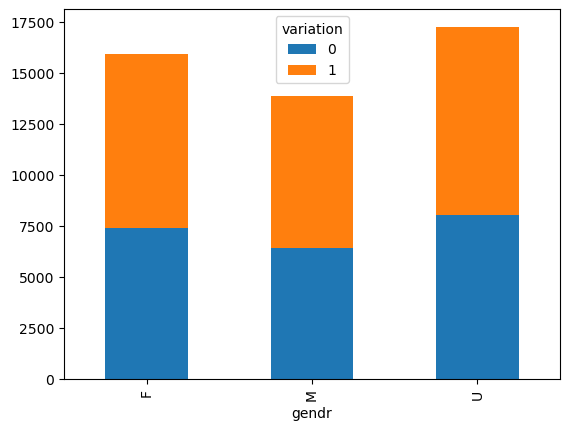

In [80]:
crosstab_result_gen_var

crosstab_result_gen_var.plot(kind="bar", stacked=True)

In [81]:
# H0 = There is no association between 'variation' and 'gendr'  --- Null Hypothesis p>=0.05
# H1 = There is an association between 'variation' and 'gendr'  --- Alternative Hypothesis p<0.05

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result_gen_var)

chi2_statistic, chi2_p_value

if chi2_p_value < 0.05:
    print("We reject the null hypothesis. There is an association between 'variation' and 'gendr'.")
else:
    print("There are no enough evidence that there is an association between 'variation' and 'gendr'.")



There are no enough evidence that there is an association between 'variation' and 'gendr'.


In [82]:
crosstab_result_gen_bal = get_crosstab(df_ambos_portales["gendr"], df_ambos_portales["bal"])

In [83]:
# H0 = There is no association between 'balance' and 'gendr'  --- Null Hypothesis p>=0.05
# H1 = There is an association between 'balance' and 'gendr'  --- Alternative Hypothesis p<0.05

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result_gen_bal)

chi2_statistic, chi2_p_value

if chi2_p_value < 0.05:
    print("We reject the null hypothesis. There is an association between 'balance' and 'gendr'.")
else:
    print("There are no enough evidence that there is an association between 'balance' and 'gendr'.")

We reject the null hypothesis. There is an association between 'balance' and 'gendr'.


In [84]:
# Are Male balance mean greater than Female or Unknowns balance mean?

df_female = df_ambos_portales[(df_ambos_portales["gendr"] == "F")]["bal"]
df_male = df_ambos_portales[df_ambos_portales["gendr"] == "M"]["bal"]
df_unknown = df_ambos_portales[df_ambos_portales["gendr"] == "U"]["bal"]

p_value_MvF = st.ttest_ind(df_male, df_female, alternative="greater")
p_value_FvU = st.ttest_ind(df_female, df_unknown, alternative="greater")

if p_value_MvF[1] < 0.05 and p_value_FvU[1] < 0.05:
    print("We reject the null hypothesis from both hypotheses. Males balance mean are greater than females or unknowns balance mean.")
else:
    print("There are no enough evidence to refuse the null hypothesis.")

We reject the null hypothesis from both hypotheses. Males balance mean are greater than females or unknowns balance mean.


In [85]:
# IS THE AVERAGE BALANCE DIFFERENT DEPPENDING ON AGE?
crosstab_result_age_bal = get_crosstab(df_ambos_portales["clnt_age"], df_ambos_portales["bal"])


In [86]:
# H0 = There is no association between 'clnt_age' and 'bal'  --- Null Hypothesis p>=0.05
# H1 = There is an association between 'clnt_age' and 'bal'  --- Alternative Hypothesis p<0.05

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result_gen_bal)

chi2_statistic, chi2_p_value

if chi2_p_value < 0.05:
    print("We reject the null hypothesis. There is an association between 'clnt_age' and 'gendr'.")
else:
    print("There are no enough evidence that there is an association between 'clnt_age' and 'gendr'.")

We reject the null hypothesis. There is an association between 'clnt_age' and 'gendr'.


# DIAS 3 Y 4 DANI

In [87]:
# Filtrar las compras confirmadas (process_step = 4)
df_all['num_compras'] = df_all['process_step'].apply(lambda x: 1 if x == 4 else 0)          # Creamos columna número de compras

# Calcular ICU
df_all['ICU'] = (df_all['logons_6_mnth'] + df_all['calls_6_mnth'] + df_all['num_compras']) / (df_all['clnt_tenure_mnth'] + df_all['num_accts'])

# Comparar el rendimiento entre portales (1 para nuevo, 0 para antiguo)
kpi_portal_antiguo = df_all[df_all['variation'] == 0]['ICU'].mean()
kpi_portal_nuevo = df_all[df_all['variation'] == 1]['ICU'].mean()

print("ICU - Portal Antiguo:", kpi_portal_antiguo)
print("ICU - Portal Nuevo:", kpi_portal_nuevo)

ICU - Portal Antiguo: 0.08030271633482752
ICU - Portal Nuevo: 0.07897087931808534


In [88]:
# Calcular total de compras y visitas para cada portal
total_visitas_antiguo = df_all[df_all['variation'] == 0]['visit_id'].nunique()
total_compras_antiguo = df_all[(df_all['variation'] == 0) & (df_all['process_step'] == 4)]['visit_id'].nunique()

total_visitas_nuevo = df_all[df_all['variation'] == 1]['visit_id'].nunique()
total_compras_nuevo = df_all[(df_all['variation'] == 1) & (df_all['process_step'] == 4)]['visit_id'].nunique()

tcc_antiguo = total_compras_antiguo / total_visitas_antiguo
tcc_nuevo = total_compras_nuevo / total_visitas_nuevo

print("TCC - Portal Antiguo:", tcc_antiguo)
print("TCC - Portal Nuevo:", tcc_nuevo)

TCC - Portal Antiguo: 0.4968596708384908
TCC - Portal Nuevo: 0.5740254574383453


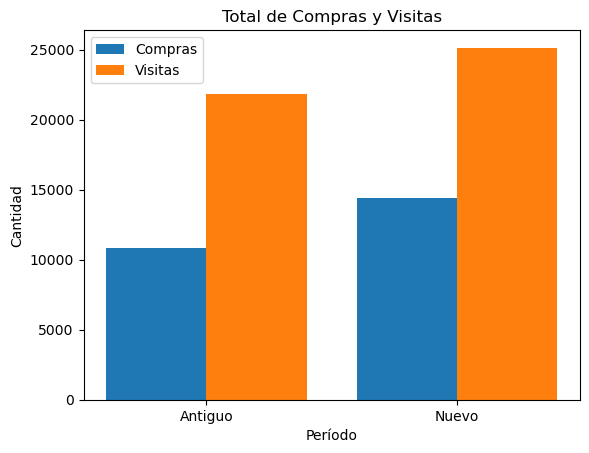

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Crea un arreglo con las etiquetas del eje x
x = np.arange(2)

# Crea un gráfico de barras
plt.bar(x - 0.2, [total_compras_antiguo, total_compras_nuevo], label='Compras', width=0.4)
plt.bar(x + 0.2, [total_visitas_antiguo, total_visitas_nuevo], label='Visitas', width=0.4)

# Agrega un título y etiquetas a los ejes
plt.title('Total de Compras y Visitas')
plt.xlabel('Período')
plt.ylabel('Cantidad')

# Agrega etiquetas al eje x
plt.xticks(x, ['Antiguo', 'Nuevo'])

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()

In [90]:
total_compras_antiguo, total_compras_nuevo,total_visitas_antiguo,total_visitas_nuevo

(10838, 14431, 21813, 25140)

In [91]:
# Calcular duración de las visitas
df_all['visit_duration'] = df_all.groupby('visit_id')['date_time'].transform(lambda x: (x.max() - x.min()).total_seconds())

# Filtrar las visitas con compras
compras_antiguo = df_all[(df_all['variation'] == 0) & (df_all['process_step'] == 4)]
compras_nuevo = df_all[(df_all['variation'] == 1) & (df_all['process_step'] == 4)]

dpc_antiguo = compras_antiguo['visit_duration'].mean()
dpc_nuevo = compras_nuevo['visit_duration'].mean()

print("DPC - Portal Antiguo:", dpc_antiguo)
print("DPC - Portal Nuevo:", dpc_nuevo)

DPC - Portal Antiguo: 440.6476714648603
DPC - Portal Nuevo: 480.1821790390426


In [92]:
df_all.head()

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation,num_compras,ICU,visit_duration
0,836976,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:51:13,1,1,0.213333,1785.0
1,836976,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:47:50,1,1,0.213333,1785.0
2,836976,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:46:45,1,1,0.213333,1785.0
3,836976,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,3,2017-04-02 11:23:08,1,0,0.200000,1785.0
4,836976,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,2,2017-04-02 11:22:24,1,0,0.200000,1785.0


In [93]:
# Asegurarnos de que 'date_time' esté en formato datetime
df_all['date_time'] = pd.to_datetime(df_all['date_time'])

# Extraer solo la parte de la hora (HH:MM:SS) si es necesario
df_all['time'] = df_all['date_time'].dt.time

# Ordenar los datos por client_id, visit_id y process_step
df_sorted = df_all.sort_values(by=['client_id', 'visit_id', 'process_step'])

# Calcular el tiempo entre pasos, ignorando el primer paso
df_sorted['time_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Filtrar los process_step > 0 para evitar valores incorrectos para el primer paso
df_filtered = df_sorted[df_sorted['process_step'] > 0]

# Filtrar los datos por portales
df_antiguo = df_filtered[df_filtered['variation'] == 0]
df_nuevo = df_filtered[df_filtered['variation'] == 1]

# Calcular el tiempo promedio entre pasos para cada portal
avg_time_diff_antiguo = df_antiguo.groupby('process_step')['time_diff'].mean()
avg_time_diff_nuevo = df_nuevo.groupby('process_step')['time_diff'].mean()

# Crear un DataFrame para las comparaciones
df_avg_time_diff = pd.DataFrame({
    'Control': avg_time_diff_antiguo.dt.total_seconds(),
    'Test': avg_time_diff_nuevo.dt.total_seconds()
})

# Gráfico de barras
df_avg_time_diff.plot(kind='bar', figsize=(10, 6))
plt.title('Tiempo Promedio Entre Pasos para Cada Portal')
plt.xlabel('Process Step')
plt.ylabel('Tiempo Promedio (segundos)')
plt.xticks(rotation=0)
plt.show()

NameError: name 'pd' is not defined

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los process_step > 0 para evitar valores incorrectos para el primer paso
df_filtered = df_sorted[df_sorted['process_step'] > 0].copy()

# Calcular el tiempo acumulado por visita y por paso
# Primero, calculamos el tiempo del paso anterior (equivalente a lag)
df_filtered['time_diff_shifted'] = df_filtered.groupby(['client_id', 'visit_id'])['time_diff'].shift()

# Luego, sumamos el tiempo acumulado de los pasos anteriores para cada cliente y visita
df_filtered['time_accumulated'] = df_filtered.groupby(['client_id', 'visit_id'])['time_diff_shifted'].cumsum().fillna(pd.Timedelta(seconds=0))

# Filtrar nuevamente por portales
df_control_accum = df_filtered[df_filtered['variation'] == 0]
df_test_accum = df_filtered[df_filtered['variation'] == 1]

# Calcular el tiempo acumulado promedio por cada paso en segundos
acc_time_antiguo = df_control_accum.groupby('process_step')['time_accumulated'].mean().dt.total_seconds()
acc_time_nuevo = df_test_accum.groupby('process_step')['time_accumulated'].mean().dt.total_seconds()

# Crear un DataFrame para las comparaciones
df_acc_time = pd.DataFrame({
    'Portal Antiguo': acc_time_antiguo,
    'Portal Nuevo': acc_time_nuevo
})

# Eliminar filas con valores NaN en cualquier columna (si las hay)
df_acc_time.dropna(inplace=True)

# Crear un DataFrame con el punto (0, 0)
df_zero_point = pd.DataFrame({
    'Portal Antiguo': [0],
    'Portal Nuevo': [0]
}, index=[0])

# Concatenar el punto (0, 0) con los datos acumulados
df_acc_time = pd.concat([df_zero_point, df_acc_time])

# Crear el gráfico de líneas, incluyendo el punto (0, 0)
df_acc_time.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Tiempo Acumulado Promedio por Proceso para Cada Portal (Incluyendo Punto 0)')
plt.xlabel('Process Step')
plt.ylabel('Tiempo Acumulado (segundos)')
plt.grid(True)
plt.show()


In [ ]:
# Visit duration depends on variation?

control_times = df_control_accum['time_accumulated'].dt.total_seconds()
test_times = df_test_accum['time_accumulated'].dt.total_seconds()

st.ttest_ind(test_times, control_times, alternative="greater")

# We can confimr that the test time is greater than the control time with a 95% confidence

# DIA 5

In [ ]:
df_control

In [1444]:
df_ambos_portales['confirmed_purchase'] = df_ambos_portales['process_step'].apply(lambda x: 1 if x == 4 else 0)

crosstab_result_age_confirm = get_crosstab(df_ambos_portales['clnt_age'], df_ambos_portales['confirmed_purchase'])

In [ ]:
# H0 = There is no association between 'balance' and 'gendr'  --- Null Hypothesis p>=0.05
# H1 = There is an association between 'balance' and 'gendr'  --- Alternative Hypothesis p<0.05

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result_age_confirm)

chi2_statistic, chi2_p_value

if chi2_p_value < 0.05:
    print("We reject the null hypothesis. There is an association between 'age' and confirming purchase.")
else:
    print("There is no significant evidence to suggest an association between 'age' and confirming purchase.")

In [ ]:
df_all

In [33]:
df_all.to_csv('data/df_all_propio.csv', index=False)